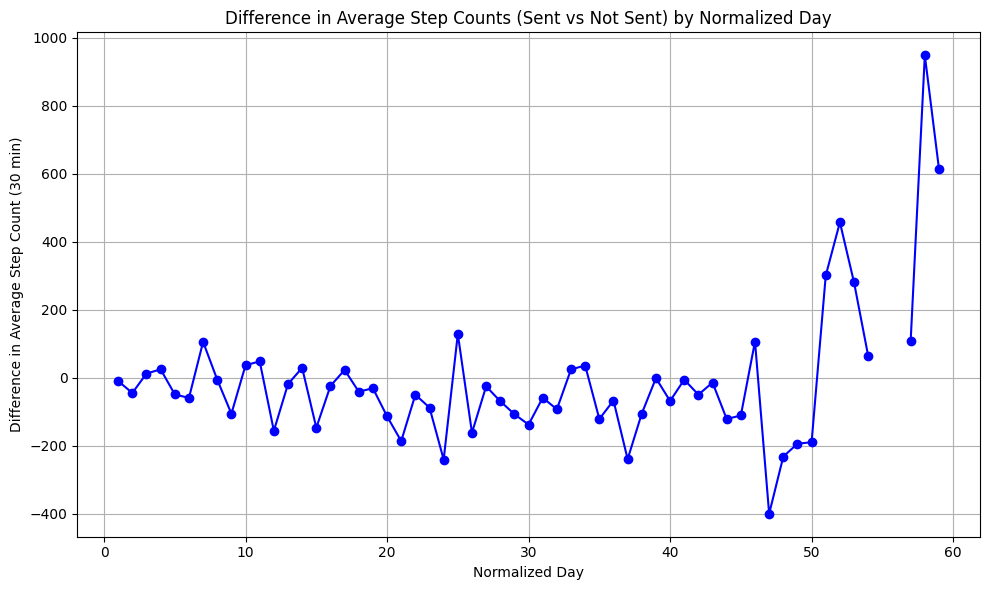

   normalized_day  jbsteps30_send  jbsteps30_no_send       diff
0               1      414.868421         424.537037  -9.668616
1               2      243.954023         288.467532 -44.513509
2               3      252.205479         239.511905  12.693575
3               4      319.454545         294.547945  24.906600
4               5      262.384615         311.048780 -48.664165


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_send = '../data/modified_data/Cleaned Dataset.csv'  
file_path_no_send = '../data/modified_data/Cleaned Unsent Dataset.csv'  

send_data = pd.read_csv(file_path_send)
no_send_data = pd.read_csv(file_path_no_send)

# Clean the column names by stripping leading/trailing spaces
send_data.columns = send_data.columns.str.strip()
no_send_data.columns = no_send_data.columns.str.strip()

# Convert 'sugg.decision.utime' to datetime format
send_data['sugg.decision.utime'] = pd.to_datetime(send_data['sugg.decision.utime'])
no_send_data['sugg.decision.utime'] = pd.to_datetime(no_send_data['sugg.decision.utime'])

# Normalize the study days for each user by setting the first day as day 1
send_data['normalized_day'] = send_data.groupby('user.index')['sugg.decision.utime'].transform(lambda x: (x - x.min()).dt.days + 1)
no_send_data['normalized_day'] = no_send_data.groupby('user.index')['sugg.decision.utime'].transform(lambda x: (x - x.min()).dt.days + 1)

# Group by the normalized day and calculate the average step counts for jbsteps30 for both send and no send data
send_avg_steps_normalized = send_data.groupby('normalized_day')['jbsteps30'].mean().reset_index()
no_send_avg_steps_normalized = no_send_data.groupby('normalized_day')['jbsteps30'].mean().reset_index()

# Merge the data into a single DataFrame for comparison
comparison_df_normalized = pd.merge(send_avg_steps_normalized, no_send_avg_steps_normalized, on='normalized_day', how='outer', suffixes=('_send', '_no_send'))

# Calculate the difference in averages for each normalized day
comparison_df_normalized['diff'] = comparison_df_normalized['jbsteps30_send'] - comparison_df_normalized['jbsteps30_no_send']

# Create a plot to compare the difference in average step counts over normalized days
plt.figure(figsize=(10, 6))
plt.plot(comparison_df_normalized['normalized_day'], comparison_df_normalized['diff'], label='Difference in Step Count (Sent vs Not Sent)', marker='o', color='blue')
plt.title('Difference in Average Step Counts (Sent vs Not Sent) by Normalized Day')
plt.xlabel('Normalized Day')
plt.ylabel('Difference in Average Step Count (30 min)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the comparison table for normalized days
print(comparison_df_normalized.head())
